# Mini-Project

## Table of Content

* [Setup](#setup)
* Supervised Learning
    * [Naive Bayes](#naive-bayes)
    * [SVM](#svm)
    * [Decision Tree](#decision-tree)
    * [KNN](#knn)
    * [Random Forest](#random-forest)
    * [Adaboost](#adaboost)

<a id = 'setup'></a>
# Setup

In [ ]:
%run "~/github/udacity-dand/machine-learning/ud120-projects/tools/startup.py"

<a id = 'naive-bayes'></a>
# Naive Bayes

In [ ]:
# %load nb_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project.

    Use a Naive Bayes Classifier to identify emails by their authors

    authors and labels:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()

t0 = time()
clf.fit(features_train, labels_train)
print 'training time: ', round(time() - t0, 3), 's'

t1 = time()
pred = clf.predict(features_test)
print 'predict time:', round(time() - t1, 3), 's'

t2 = time()
pred_accuracy1 = accuracy_score(pred, labels_test)
print 'check time 1: ', round(time() - t2, 3), 's'

t3 = time()
pred_accuracy2 = clf.score(features_test, labels_test)
print 'check time 2: ', round(time() - t3, 3), 's'

print(pred_accuracy1)
print(pred_accuracy2)
#########################################################


`sklearn.metrics.accuracy_score()` is much faster than `clf.scores()`!

<a id = 'svm'></a>
# SVM

In [ ]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc

#########################################################


A very good rate, but also very slow. Let's try some another way to speed it up.

In [ ]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# use 1% of data

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel='linear')

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


There is a tradeoff between speed and accuracy. Let's try another kind of SVM.

In [ ]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel='rbf')

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


This is not a very good accuracy rate. Let's play around with the parameters.

In [ ]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf', C = 10000)

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


Under 1% testing data:

|C|Accuracy|Time|
|---|---|---|
|10|0.616040955631|0s|
|100|0.616040955631|0s|
|1000|0.821387940842|0s|
|100000|0.892491467577|0s|

In [ ]:
clf.predict(features_test[[10, 26, 50]])

In [ ]:
len(pre == 1)

In [ ]:
(pre == 1).sum()

<a id = 'decision-tree'></a>
# Decision Tree

In [ ]:
# %load dt_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf.fit(features_train, labels_train)
print "the fitting takes: ", round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print "the test takes: ", round(time() - t1), 's'

accuracy_score(pre, labels_test)

#########################################################


In [ ]:
features_train.shape

Change the percentile in email.preprocess.py from 10 to 1 to adjust the features.

In [ ]:
# %load dt_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf.fit(features_train, labels_train)
print "the fitting takes: ", round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print "the test takes: ", round(time() - t1), 's'

accuracy_score(pre, labels_test)

#########################################################


In [ ]:
features_train.shape

In [ ]:
from email_preprocess import preprocess
features_train, features_test, labels_train, labels_test = preprocess()

In [ ]:
features_train.shape

In [ ]:
%run /Users/guanrongfu/ml-practice/tools/email_preprocess.py
features_train, features_test, labels_train, labels_test = preprocess()
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf.fit(features_train, labels_train)
print "the fitting takes: ", round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print "the test takes: ", round(time() - t1), 's'

accuracy_score(pre, labels_test)

<a id = 'knn'></a>
# K Nearest Neighbors (KNN)

In [ ]:
# %load knn_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()

t0 = time()
neigh.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = neigh.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


KNN has a function that the previous three models doesn't. It is the predict_proba() function. It is designed to deal with multi-class predictions. It will return probability estimates for the test data X.

In [ ]:
neigh.predict_proba(features_test)

<a id = 'random-forest'></a>
# Random Forest

In [ ]:
# %load rf_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


<a id = 'adaboost'></a>
# Adaboost

In [ ]:
# %load adaboost_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier()

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


# Explore Enron Dataset

Read the Enron Email Dataset

In [ ]:
# %load explore_enron_data.py
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

Check how many people are in the dataset.

In [ ]:
len(enron_data)

Check how many features for each person.

In [ ]:
for key in enron_data:
    print len(enron_data[key])
    break

How many people in the dataset actually has person of interest.

In [ ]:
count = 0
for key in enron_data:
    if enron_data[key]['poi']:
        count += 1
print count

There is a text file containing all the POI names. Check how many people are in it.

In [ ]:
with open('poi_names.txt', 'r') as f:
    f.readline()
    names = f.read()
    names = names.split('\n')
    names = names[1:len(names)-1]
    
len(names)

The name within the dataset following certain format: 'LAST NAME FIRST NAME' or 
'LAST NAME FIRST NAME MIDDLE INITIAL'. I am going to check the information for some people. I will write a function to transfer the name to the format I want.

In [ ]:
def update_name(name):
    new_name = name.upper()
    new_name = new_name.split(' ')
    
    if len(new_name) == 2:
        new_name = list(reversed(new_name))
        new_name = ' '.join(new_name)
    elif len(new_name) == 3:
        new_order = [2, 0, 1]
        new_name = [new_name[i] for i in new_order]
        new_name = ' '.join(new_name)
    return new_name

In [ ]:
name = update_name('Wesley Colwell')
enron_data[name]

In [ ]:
name = update_name('Jeffrey K Skilling')
enron_data[name]

In [ ]:
name = update_name('Kenneth L Lay')
enron_data[name]

In [ ]:
count = 0
for key in enron_data:
    if enron_data[key]['salary'] != 'NaN':
        count += 1
print count

In [ ]:
count = 0
for key in enron_data:
    if enron_data[key]['email_address'] != 'NaN':
        count += 1
print count

In [ ]:
count = 0
for key in enron_data:
    if enron_data[key]['total_payments'] != 'NaN':
        count += 1
print count

In [ ]:
count = 0
for key in enron_data:
    if (enron_data[key]['poi']) and (enron_data[key]['total_payments'] == 'NaN'):
        count += 1
print count

# Regression

In [ ]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)
print reg.coef_
print reg.intercept_







### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [ ]:
reg.score(feature_train, target_train)

In [ ]:
reg.score(feature_test, target_test)

Change the relationship to bonus and long-term-incentive.

In [ ]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)
print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)




### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [ ]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)
print "With Outliers:"
print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
print "Without Outliers"
print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


# Outliers

In [ ]:
# %load outlier_removal_regression.py
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print "slope: ", reg.coef_
print "intercept:", reg.intercept_

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


In [ ]:
reg.score(ages_test, net_worths_test)

In [ ]:
# %load outlier_removal_regression.py
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print "slope: ", reg.coef_
print "intercept:", reg.intercept_



try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


In [ ]:
reg.coef_

In [ ]:
reg.score(ages_test, net_worths_test)

In [ ]:
# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot as plt

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for item in data:
    salary = item[0]
    bonus = item[1]
    plt.scatter(salary, bonus)

plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

Since there is a big outlier. I found it is "total" in the dataset that we need to remove it.

In [ ]:
# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot as plt

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data_dict.pop("TOTAL", 0)
data = featureFormat(data_dict, features)


### your code below
for item in data:
    salary = item[0]
    bonus = item[1]
    plt.scatter(salary, bonus)

plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()


In [ ]:
# %load k_means_cluster.py
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


# K-Means

In [ ]:
# %load k_means_cluster.py
#!/usr/bin/python

"""
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it!
data_dict.pop("TOTAL", 0)


### the input features we want to use
### can be any key in the person-level dictionary (salary, director_fees, etc.)
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
pred = kmeans.fit_predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [ ]:
# %load k_means_cluster.py
#!/usr/bin/python

"""
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it!
data_dict.pop("TOTAL", 0)


### the input features we want to use
### can be any key in the person-level dictionary (salary, director_fees, etc.)
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = 'total_payments'
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
pred = kmeans.fit_predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [ ]:
stock = [data_dict[key]['exercised_stock_options'] for key in data_dict
         if data_dict[key]['exercised_stock_options'] != 'NaN']
print "min: ", min(stock)
print "max: ", max(stock)

In [ ]:
min_salary = float("+inf")
max_salary = float("-inf")

for key in data_dict:
    salary = data_dict[key]['salary']
    if salary != "NaN":
        if salary > max_salary:
            max_salary = salary
        if salary < min_salary:
            min_salary = salary

print "min: ", min_salary
print "max: ", max_salary

# Feature Scaling

Feature Scaling with 2 features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
scaled = min_max_scaler.fit(finance_features)

In [ ]:
scaled.transform([[200000, 1000000]])

# Text Learning

In [1]:
from nltk.corpus import stopwords

In [2]:
wd = stopwords.words('english')

In [3]:
len(wd)

153

In [8]:
# %load parse_out_email_text.py
#!/usr/bin/python

from nltk.stem.snowball import SnowballStemmer
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated) 
        
        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)
        
        """


    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    if len(content) > 1:
        ### remove punctuation
        text_string = content[1].translate(string.maketrans("", ""), string.punctuation)

        ### project part 2: comment out the line below
        words = text_string

        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)
        




    return words

    

def main():
    ff = open("../text_learning/test_email.txt", "r")
    text = parseOutText(ff)
    print text



if __name__ == '__main__':
    main()





Hi Everyone  If you can read this message youre properly using parseOutText  Please proceed to the next part of the project



In [9]:
# %load parse_out_email_text.py
#!/usr/bin/python

from nltk.stem.snowball import SnowballStemmer
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated)

        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)

        """


    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    new_words = []
    if len(content) > 1:
        ### remove punctuation
        text_string = content[1].translate(string.maketrans("", ""), string.punctuation)

        ### project part 2: comment out the line below
        # words = text_string

        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)
        stemmer = SnowballStemmer('english')

        old_words = text_string.split()

        for word in old_words:
            word = stemmer.stem(word)
            new_words.append(word)

        words = ' '.join(new_words)

    return words



def main():
    ff = open("../text_learning/test_email.txt", "r")
    text = parseOutText(ff)
    print text



if __name__ == '__main__':
    main()


hi everyon if you can read this messag your proper use parseouttext pleas proceed to the next part of the project


In [11]:
# %load vectorize_text.py
#!/usr/bin/python

import os
import pickle
import re
import sys

sys.path.append( "../tools/" )
from parse_out_email_text import parseOutText

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""

from_sara  = open("from_sara.txt", "r")
from_chris = open("from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker
temp_counter = 0
remove_list = ["sara", "shackleton", "chris", "germani"]

for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset
        temp_counter += 1
        if temp_counter < 200:
            path = os.path.join('..', path[:-1])
            email = open(path, "r")
            ### use parseOutText to extract the text from the opened email
            words = parseOutText(email)
            ### use str.replace() to remove any instances of the words
            ### ["sara", "shackleton", "chris", "germani"]
            for item in remove_list:
                words = words.replace(item, '')

            ### append the text to word_data
            word_data.append(words)
            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            from_data.append(0 if name == 'Sara' else 1)

            email.close()

print "emails processed"
from_sara.close()
from_chris.close()

pickle.dump( word_data, open("your_word_data.pkl", "w") )
pickle.dump( from_data, open("your_email_authors.pkl", "w") )





### in Part 4, do TfIdf vectorization here


emails processed


In [12]:
word_data[152]

u'tjonesnsf stephani and sam need nymex calendar'

In [13]:
# %load vectorize_text.py
#!/usr/bin/python

import os
import pickle
import re
import sys

sys.path.append( "../tools/" )
from parse_out_email_text import parseOutText

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""

from_sara  = open("from_sara.txt", "r")
from_chris = open("from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker

remove_list = ["sara", "shackleton", "chris", "germani"]

for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset


            path = os.path.join('..', path[:-1])
            email = open(path, "r")
            ### use parseOutText to extract the text from the opened email
            words = parseOutText(email)
            ### use str.replace() to remove any instances of the words
            ### ["sara", "shackleton", "chris", "germani"]
            for item in remove_list:
                words = words.replace(item, '')

            ### append the text to word_data
            word_data.append(words)
            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            from_data.append(0 if name == 'sara' else 1)

            email.close()

print "emails processed"
from_sara.close()
from_chris.close()

pickle.dump( word_data, open("your_word_data.pkl", "w") )
pickle.dump( from_data, open("your_email_authors.pkl", "w") )





### in Part 4, do TfIdf vectorization here

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
new_word_data = tfidf.fit_transform(word_data)


emails processed


In [14]:
len(set(tfidf.get_feature_names()))

38757

In [15]:
tfidf.get_feature_names()[34597]

u'stephaniethank'

# Feature Selection

In [17]:
# %load find_signature.py
#!/usr/bin/python

import pickle
import numpy
numpy.random.seed(42)


### The words (features) and authors (labels), already largely processed.
### These files should have been created from the previous (Lesson 10)
### mini-project.
words_file = "../text_learning/your_word_data.pkl"
authors_file = "../text_learning/your_email_authors.pkl"
word_data = pickle.load( open(words_file, "r"))
authors = pickle.load( open(authors_file, "r") )



### test_size is the percentage of events assigned to the test set (the
### remainder go into training)
### feature matrices changed to dense representations for compatibility with
### classifier functions in versions 0.15.2 and earlier
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()


### a classic way to overfit is to use a small number
### of data points and a large number of features;
### train on only 150 events to put ourselves in this regime
features_train = features_train[:150]
labels_train   = labels_train[:150]



### your code goes here
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)
predict = clf.predict(features_test)

print accuracy_score(predict, labels_test)


//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.947667804323


In [18]:
import numpy as np

In [19]:
feature_words = tfidf.get_feature_names()
feature_importances = clf.feature_importances_

In [20]:
new_order = np.argsort(feature_importances)

for i in range(10):
    print "feature number {}: {} ({})".format(i+1, feature_words[new_order[i]], feature_importances[new_order[i]])

feature number 1: shirt (0.764705882353)
feature number 2: secreto (0.134028294862)
feature number 3: forwardene113000doc (0.0749500333111)
feature number 4: king (0.0263157894737)
feature number 5: basic (0.0)
feature number 6: bass (0.0)
feature number 7: basp (0.0)
feature number 8: basketbal (0.0)
feature number 9: basket (0.0)
feature number 10: basisthank (0.0)


In [21]:
feature_words.index('shirt')

33614

In [22]:
feature_words[33614]

u'shirt'

In [23]:
#!/usr/bin/python

import pickle
import numpy
numpy.random.seed(42)


### The words (features) and authors (labels), already largely processed.
### These files should have been created from the previous (Lesson 10)
### mini-project.
words_file = "../text_learning/your_word_data.pkl"
authors_file = "../text_learning/your_email_authors.pkl"
word_data = pickle.load( open(words_file, "r"))
authors = pickle.load( open(authors_file, "r") )



### test_size is the percentage of events assigned to the test set (the
### remainder go into training)
### feature matrices changed to dense representations for compatibility with
### classifier functions in versions 0.15.2 and earlier
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()


### a classic way to overfit is to use a small number
### of data points and a large number of features;
### train on only 150 events to put ourselves in this regime
features_train = features_train[:150]
labels_train   = labels_train[:150]



### your code goes here
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)
predict = clf.predict(features_test)

print accuracy_score(predict, labels_test)

feature_words = vectorizer.get_feature_names()
feature_importances = clf.feature_importances_
new_order = np.argsort(feature_importances)[::-1]

for i in range(10):
    print "feature number {}: {} ({})".format(i+1, feature_words[new_order[i]], feature_importances[new_order[i]])

feature_words.index(feature_words[new_order[0]])

0.947667804323
feature number 1: sshacklensf (0.764705882353)
feature number 2: smith (0.134028294862)
feature number 3: fyi (0.0749500333111)
feature number 4: leav (0.0263157894737)
feature number 5: bellhouectect (0.0)
feature number 6: bellvill (0.0)
feature number 7: bellsouth (0.0)
feature number 8: belllonectect (0.0)
feature number 9: bellissimo (0.0)
feature number 10: bellisario (0.0)


33614

Remove the significant word, and refit.

In [26]:
# %load vectorize_text.py
#!/usr/bin/python

import os
import pickle
import re
import sys

sys.path.append( "../tools/" )
from parse_out_email_text import parseOutText

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""

from_sara  = open("from_sara.txt", "r")
from_chris = open("from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker

remove_list = ["sara", "shackleton", "chris", "germani", "sshacklensf"]

for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset


            path = os.path.join('..', path[:-1])
            email = open(path, "r")
            ### use parseOutText to extract the text from the opened email
            words = parseOutText(email)
            ### use str.replace() to remove any instances of the words
            ### ["sara", "shackleton", "chris", "germani"]
            for item in remove_list:
                words = words.replace(item, '')

            ### append the text to word_data
            word_data.append(words)
            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            from_data.append(0 if name == 'sara' else 1)

            email.close()

print "emails processed"
from_sara.close()
from_chris.close()

pickle.dump( word_data, open("your_word_data.pkl", "w") )
pickle.dump( from_data, open("your_email_authors.pkl", "w") )





### in Part 4, do TfIdf vectorization here

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
new_word_data = tfidf.fit_transform(word_data)


emails processed


In [28]:
%run find_signature.py

0.950511945392


In [29]:
feature_words = vectorizer.get_feature_names()
feature_importances = clf.feature_importances_
new_order = np.argsort(feature_importances)[::-1]

for i in range(10):
    print "feature number {}: {} ({})".format(i+1, feature_words[new_order[i]], feature_importances[new_order[i]])

feature_words.index(feature_words[new_order[0]])

feature number 1: cgermannsf (0.666666666667)
feature number 2: 62502pst (0.162601626016)
feature number 3: deal (0.093808630394)
feature number 4: cgerman (0.0506072874494)
feature number 5: trade (0.0263157894737)
feature number 6: bellhouectect (0.0)
feature number 7: bellvill (0.0)
feature number 8: bellsouth (0.0)
feature number 9: belllonectect (0.0)
feature number 10: bellissimo (0.0)


14343

Get rid of the other most significant word again, and re-run the code.

In [34]:
# %load vectorize_text.py
#!/usr/bin/python

import os
import pickle
import re
import sys

sys.path.append( "../tools/" )
from parse_out_email_text import parseOutText

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""

from_sara  = open("from_sara.txt", "r")
from_chris = open("from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker

remove_list = ["sara", "shackleton", "chris", "germani", "sshacklensf", "cgermannsf"]

for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset


            path = os.path.join('..', path[:-1])
            email = open(path, "r")
            ### use parseOutText to extract the text from the opened email
            words = parseOutText(email)
            ### use str.replace() to remove any instances of the words
            ### ["sara", "shackleton", "chris", "germani"]
            for item in remove_list:
                words = words.replace(item, '')

            ### append the text to word_data
            word_data.append(words)
            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            from_data.append(0 if name == 'sara' else 1)

            email.close()

print "emails processed"
from_sara.close()
from_chris.close()

pickle.dump( word_data, open("your_word_data.pkl", "w") )
pickle.dump( from_data, open("your_email_authors.pkl", "w") )





### in Part 4, do TfIdf vectorization here

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
new_word_data = tfidf.fit_transform(word_data)


emails processed


In [39]:
%run find_signature.py

0.816837315131


In [40]:
feature_words = vectorizer.get_feature_names()
feature_importances = clf.feature_importances_
new_order = np.argsort(feature_importances)[::-1]

for i in range(10):
    print "feature number {}: {} ({})".format(i+1, feature_words[new_order[i]], feature_importances[new_order[i]])

feature_words.index(feature_words[new_order[0]])

feature number 1: houectect (0.363636363636)
feature number 2: fax (0.186927243449)
feature number 3: attach (0.105378579003)
feature number 4: isda (0.0840692099229)
feature number 5: pleas (0.0475805258904)
feature number 6: deal (0.0474074074074)
feature number 7: enron (0.0426666666667)
feature number 8: bond (0.0262801932367)
feature number 9: master (0.0255293305728)
feature number 10: leav (0.0248101945003)


21323

# Principal Component Analysis (PCA)


Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html




//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces


//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


done in 0.373s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.035s
Fitting the classifier to the training set
done in 21.270s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.065s
                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.38      0.48        13
     Colin Powell       0.83      0.87      0.85        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.94      0.81      0.87        36

      avg / total       0.85      0.84      

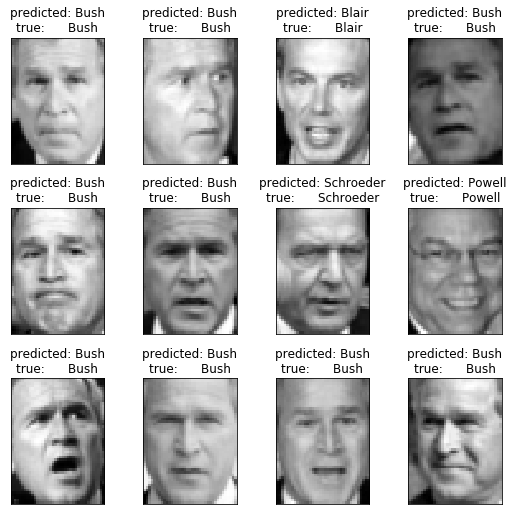

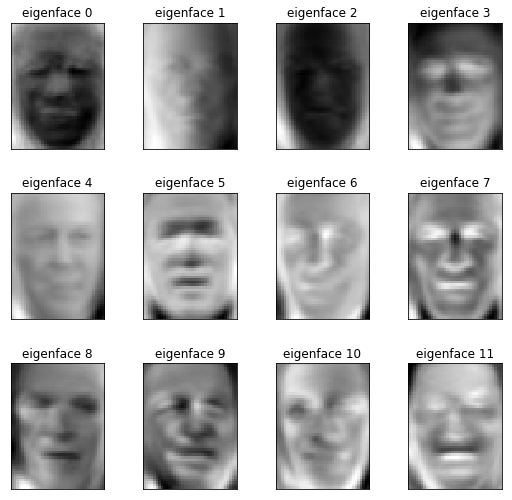

In [43]:
# %load eigenfaces.py
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

"""



print __doc__

from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print "Total dataset size:"
print "n_samples: %d" % n_samples
print "n_features: %d" % n_features
print "n_classes: %d" % n_classes


###############################################################################
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape((n_components, h, w))

print "Projecting the input data on the eigenfaces orthonormal basis"
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print "done in %0.3fs" % (time() - t0)


###############################################################################
# Train a SVM classification model

print "Fitting the classifier to the training set"
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_


###############################################################################
# Quantitative evaluation of the model quality on the test set

print "Predicting the people names on the testing set"
t0 = time()
y_pred = clf.predict(X_test_pca)
print "done in %0.3fs" % (time() - t0)

print classification_report(y_test, y_pred, target_names=target_names)
print confusion_matrix(y_test, y_pred, labels=range(n_classes))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()


In [51]:
pca.explained_variance_ratio_[1]

0.15116845543998056

# Cross Validation

In [57]:
# %load validate_poi.py
#!/usr/bin/python


"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""

import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)



### it's all yours from here forward!
from sklearn import tree
from sklearn.metrics import accuracy_score

tree = tree.DecisionTreeClassifier()
tree.fit(features, labels)
predict = tree.predict(features)
accuracy_score(predict, labels)


0.98947368421052628